In [1]:
import numpy as np
import matplotlib.pyplot as plt

import preprocessing as prep
import visualization as vis
from filtering import LPF

In [3]:
DATA_DIR_A = "titan-hf-1A"
DATA_DIR_B = "titan-hf-1B"

SENSORS = {"b_load_1": "LC1 Axial Load",
           "thermo_2": "TC2 Combustion Chamber Temperature",
           "pres_1": "PT1 Combustion Chamber Pressure",
           "pres_2": "PT2 Feedline Pressure",
           "pres_3": "PT3 Injector Pressure",
           "pres_4": "PT4 Ox-Tank Pressure"}

DRIVERS = {0: {"name": "Feedline", "false": "Close", "true": "Open"},
           1: {"name": "Ox Vent", "false": "Close", "true": "Open"},
           2: {"name": "Ground Vent", "false": "Open", "true": "Close"},
           3: {"name": "Pressurization System", "false": "Close", "true": "Open"},
           5: {"name": "Ignition", "false": "Shutoff", "true": "Ignite"}}

In [4]:
prep.process_events(DATA_DIR_A, DRIVERS)
prep.process_data(DATA_DIR_A, SENSORS)

prep.process_events(DATA_DIR_B, DRIVERS)
prep.process_data(DATA_DIR_B, SENSORS)

In [5]:
events_A = prep.import_events(DATA_DIR_A)
labels_A, data_A = prep.import_data(DATA_DIR_A, events_A)
times_A = data_A[:, 0]
print(f"HF1A Data Summary \n----------------- \n Sensors: {len(labels_A) - 1} \n" f" Samples: {len(times_A)} \n Events:  {len(events_A)}\n")

events_B = prep.import_events(DATA_DIR_B)
labels_B, data_B = prep.import_data(DATA_DIR_B, events_B)
times_B = data_B[:, 0]
print(f"HF1B Data Summary \n----------------- \n Sensors: {len(labels_B) - 1} \n" f" Samples: {len(times_B)} \n Events:  {len(events_B)}\n")

HF1A Data Summary 
----------------- 
 Sensors: 6 
 Samples: 753705 
 Events:  20

HF1B Data Summary 
----------------- 
 Sensors: 6 
 Samples: 675601 
 Events:  20



In [36]:
epA = vis.EventPlotter(data_A, events_A, dpi=100)
epB = vis.EventPlotter(data_B, events_B, dpi=100)

lpf = LPF(fs=300, length=101, cutoff=10, window="blackman")

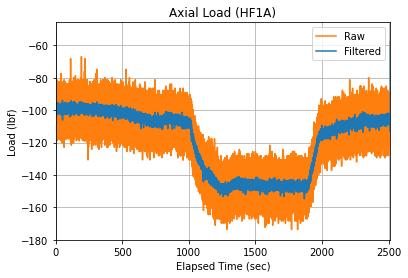

In [37]:
plt.plot(times_A, data_A[:, 1], c="tab:orange", label="Raw")
plt.plot(times_A, lpf.apply(data_A[:, 1]), c="tab:blue", label="Filtered")
plt.title("Axial Load (HF1A)"); plt.xlabel("Elapsed Time (sec)"); plt.ylabel("Load (lbf)")
plt.xlim((min(times_A), max(times_A))); plt.grid(); plt.legend()
plt.yticks((-180, -160, -140, -120, -100, -80, -60))
plt.show()

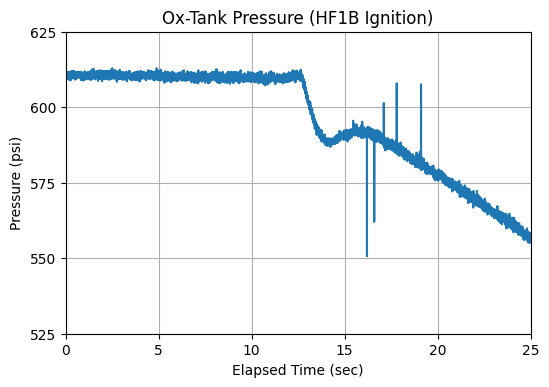

In [19]:
epB.plot(sensor_id=6, event_id=15, duration=25, filter=None,
         title="Ox-Tank Pressure (HF1B Ignition)", ylabel="Pressure (psi)",
         num_xticks=6, dif_yticks=25)